<a href="https://colab.research.google.com/github/sakshisingh998/Sakshi_new/blob/main/Sakshi_singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics



In [ ]:
#Q1
# This is a comment

#Q3
import pandas as pd
import numpy as np

#Q4
bank_train = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/bank_marketing_training")

#Q5
pd.crosstab(bank_train['previous_outcome'],bank_train['response'])

#Q6
bank_train.loc[0]

age                             56
job                      housemaid
marital                    married
education                 basic.4y
default                         no
housing                         no
loan                            no
contact                  telephone
month                          may
day_of_week                    mon
duration                       261
campaign                         1
days_since_previous            999
previous                         0
previous_outcome       nonexistent
emp.var.rate                   1.1
cons.price.idx              93.994
cons.conf.idx                -36.4
euribor3m                    4.857
nr.employed                   5191
response                        no
Name: 0, dtype: object

# Data Preparation



In [ ]:
#Q1
bank_train.shape
bank_train['index'] = pd.Series(range(0,26874))
bank_train.head

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       41  blue-collar  married              unknown  unknown      no   no   
3       25     services   single          high.school       no     yes   no   
4       29  blue-collar   single          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
26869   36       admin.  married    university.degree       no      no   no   
26870   37       admin.  married    university.degree       no     yes   no   
26871   29   unemployed   single             basic.4y       no     yes   no   
26872   73      retired  married  professional.course       no     yes   no   
26873   46  blue-collar  married  professional.course       no      no   no   

         contact mont

<Axes: title={'center': 'Histogram of Days Since Previous'}, ylabel='Frequency'>

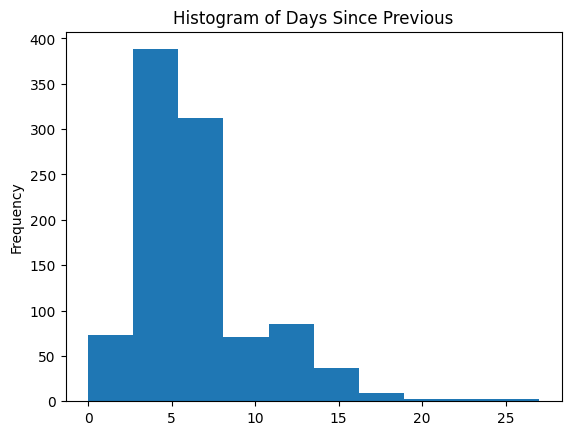

In [ ]:
#Q2
bank_train['days_since_previous'] =bank_train['days_since_previous'].replace({999: np.NaN})
#histogram(optional)
bank_train['days_since_previous'].plot(kind = 'hist',title = 'Histogram of Days Since Previous')


In [ ]:
#Q3
bank_train['education_numeric'] = bank_train['education']

dict_edu = {"education_numeric": {"illiterate": 0, "basic.4y": 4, "basic.6y": 6,"basic.9y": 9, "high.school":12, "professional.course": 12, "university.degree":16,"unknown": np.NaN}}

bank_train.replace(dict_edu, inplace=True)

In [ ]:
#Q4 Standardisation
from scipy import stats

bank_train['age_z'] = stats.zscore(bank_train['age'])

In [ ]:
#Q5 Outliers
bank_train.query('age_z > 3 | age_z < -3')
bank_train_outliers = bank_train.query('age_z > 3 | age_z < -3')
bank_train_sort = bank_train.sort_values(['age_z'], ascending=False)
bank_train_sort[['age', 'marital']].head(n=15)


,age,marital
24840,91,married
24833,91,married
26520,89,divorced
26015,89,divorced
18179,88,divorced
18181,88,divorced
18183,88,divorced
18186,88,divorced
18187,88,divorced
18188,88,divorced


# Exploratory data analysis


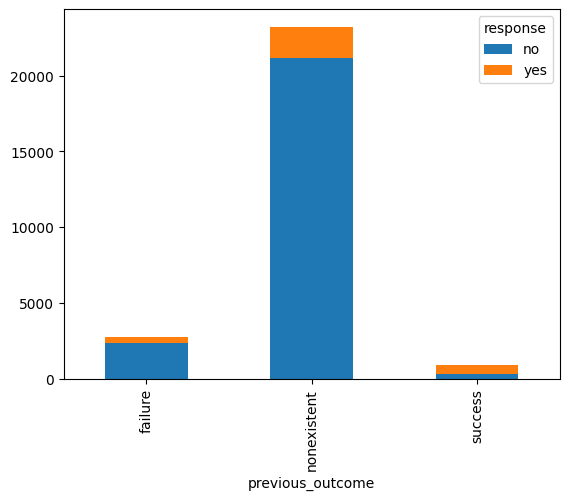

In [ ]:
#Q1 Bar graph with overlay
crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)

In [ ]:
#Q2 Contingency Table
crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])#outcome changed to response,no column named outcome
crosstab_02 = pd.crosstab(bank_train['response'], bank_train['previous_outcome'])
round(crosstab_02.div(crosstab_02.sum(0), axis = 1)*100, 1)


previous_outcome,failure,nonexistent,success
response,,,
no,86.1,91.2,36.0
yes,13.9,8.8,64.0


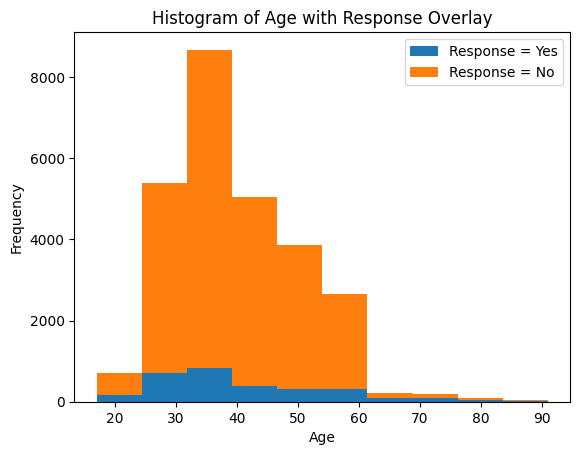

In [ ]:
#Q3 Histogram with overlay
import matplotlib.pyplot as plt

bt_age_y = bank_train[bank_train.response == "yes"]['age']
bt_age_n = bank_train[bank_train.response == "no"]['age']

plt.hist([bt_age_y, bt_age_n], bins = 10, stacked = True)
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Histogram of Age with Response Overlay')
plt.xlabel('Age'); plt.ylabel('Frequency'); plt.show()

<Axes: title={'center': 'Bar Graph of Age (Binned) with Response Overlay'}, xlabel='age_binned'>

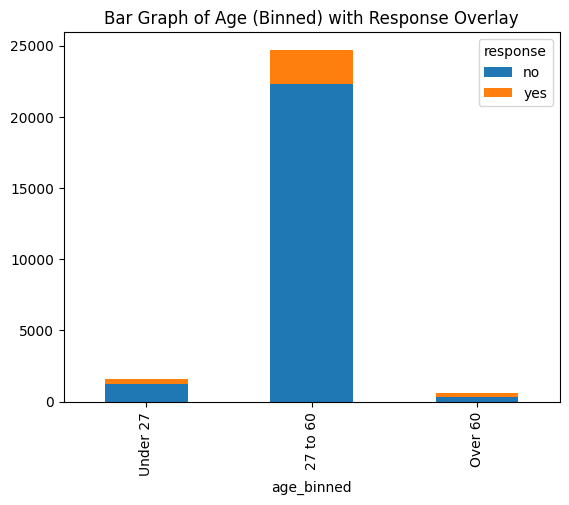

In [ ]:
#Q4 Binning on predictive values
bank_train['age_binned'] = pd.cut(x = bank_train['age'], bins = [0, 27, 60.01, 100],labels=["Under 27", "27 to 60", "Over 60"], right = False)

crosstab_02 = pd.crosstab(bank_train['age_binned'], bank_train['response'])
crosstab_02.plot(kind='bar', stacked = True,title = 'Bar Graph of Age (Binned) with Response Overlay')

#Data Preparation phase

In [ ]:
#Q1 Split (partition)
from sklearn.model_selection import train_test_split
import random
bank = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/bank_marketing_training")
bank_train, bank_test = train_test_split(bank, test_size = 0.25, random_state = 7)

bank.shape
bank_train.shape
bank_test.shape


(6719, 21)

In [ ]:
#Q2 Balancing data
bank_train['response'].value_counts()
to_resample = bank_train.loc[bank_train['response'] == "yes"]
our_resample = to_resample.sample(n = 841, replace = True)
bank_train_rebal = pd.concat([bank_train, our_resample])
bank_train_rebal['response'].value_counts()

no     17957
yes     3039
Name: response, dtype: int64

In [ ]:
#Q3 CART Decision Tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Load the data
adult_tr = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/adult_ch6_training")

# Extract the target variable
y = adult_tr[['Income']]

# Create dummy variables for the 'Marital status' column
mar_cat_pd = pd.get_dummies(adult_tr['Marital status'], prefix='Marital')

# Concatenate the dummy variables with other features
X = pd.concat((adult_tr[['Cap_Gains_Losses']], mar_cat_pd), axis=1)

# Specify feature names
X_names = ["Cap_Gains_Losses"] + list(mar_cat_pd.columns)
y_names = ["<=50K", ">50K"]

# Fit the Decision Tree model
cart01 = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=5).fit(X, y)

# Export the decision tree visualization
export_graphviz(cart01, out_file="cart01.dot", feature_names=X_names, class_names=y_names)


In [ ]:
#q4 C5.0 Decision tree
c50_01 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5).fit(X,y)
export_graphviz(c50_01, out_file = "/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/adult_ch6_training", feature_names=X_names,class_names=y_names)

c50_01.predict(X)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
#Q5 Random Forest
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rfy = np.ravel(y)

rf01 = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(X,rfy)

rf01.predict(X)


array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

# Naive bayes


Predicted,Red,White,Total
Actual,,,
Red,464,121,585
White,678,1082,1760
Total,1142,1203,2345


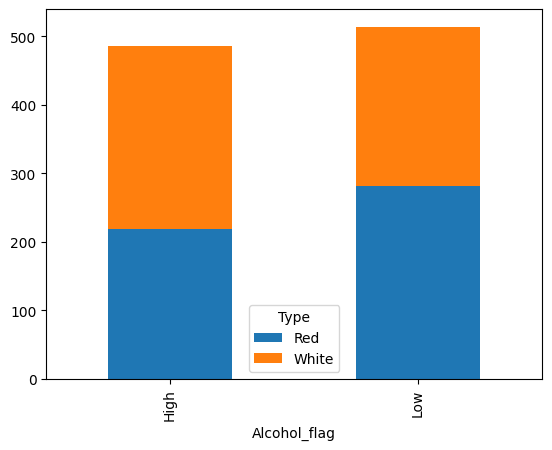

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB

wine_tr = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/wine_flag_training.csv")
wine_test = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/wine_flag_test.csv")

t1 = pd.crosstab(wine_tr['Type'], wine_tr['Alcohol_flag'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()

t1_plot = pd.crosstab(wine_tr['Alcohol_flag'], wine_tr['Type'])
t1_plot.plot(kind='bar', stacked=True)
t1

# Create dummy variables for 'Alcohol_flag' and 'Sugar_flag'
X_Alcohol_ind = pd.get_dummies(wine_tr['Alcohol_flag'], prefix='Alcohol')
X_Sugar_ind = pd.get_dummies(wine_tr['Sugar_flag'], prefix='Sugar')

# Concatenate dummy variables with other features
X = pd.concat([X_Alcohol_ind, X_Sugar_ind], axis=1)

Y = wine_tr['Type']

nb_01 = MultinomialNB().fit(X, Y)

# Create dummy variables for the test set
X_Alcohol_ind_test = pd.get_dummies(wine_test['Alcohol_flag'], prefix='Alcohol')
X_Sugar_ind_test = pd.get_dummies(wine_test['Sugar_flag'], prefix='Sugar')

# Concatenate dummy variables for the test set
X_test = pd.concat([X_Alcohol_ind_test, X_Sugar_ind_test], axis=1)

Y_predicted = nb_01.predict(X_test)

# Create a confusion matrix
ypred = pd.crosstab(wine_test['Type'], Y_predicted, rownames=['Actual'], colnames=['Predicted'])
ypred['Total'] = ypred.sum(axis=1)
ypred.loc['Total'] = ypred.sum()

ypred


# Neural Networks


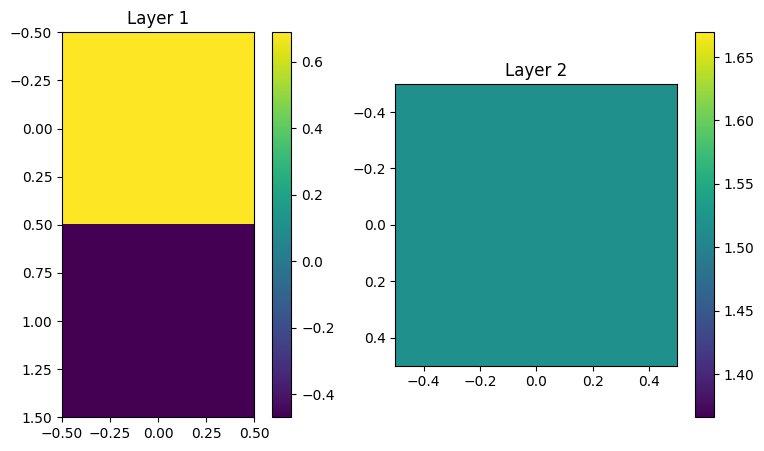

Weights:
Layer 1 weights:
[[ 0.68911464]
 [-0.47024414]]
Layer 2 weights:
[[1.51771723]]


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming 'Educ' is a suitable replacement for 'Age' in the features
X = fram_train[['Sex', 'Educ']]
y = fram_train['Death']

# Create and fit the neural network model
nnet01 = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1000)
nnet01.fit(X, y)

# Plot the neural network
plt.figure(figsize=(10, 5))
for i in range(len(nnet01.coefs_)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(nnet01.coefs_[i], interpolation='none', cmap='viridis')
    plt.title(f'Layer {i + 1}')
    plt.colorbar()
plt.show()

# Display the weights
print("Weights:")
for i, layer in enumerate(nnet01.coefs_):
    print(f"Layer {i + 1} weights:\n{layer}")


# Clustering

In [ ]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
wine_train = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/white_wine_training")

X = wine_train[['alcohol', 'sugar']]

Xz = pd.DataFrame(stats.zscore(X), columns=['alcohol', 'sugar'])
kmeans01 = KMeans(n_clusters = 2).fit(Xz)

cluster = kmeans01.labels_

Cluster1 = Xz.loc[cluster == 0]
Cluster2 = Xz.loc[cluster == 1]

wine_test = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/white_wine_training")
X_test = wine_test[['alcohol', 'sugar']]
Xz_test = pd.DataFrame(stats.zscore(X_test), columns=['alcohol','sugar'])

kmeans_test = KMeans(n_clusters = 2).fit(Xz_test)
cluster_test = kmeans_test.labels_ # Cluster membership
Cluster1_test = Xz_test.loc[cluster_test == 0]
Cluster2_test = Xz_test.loc[cluster_test == 1]
Cluster1_test.describe()
Cluster2_test.describe()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,alcohol,sugar
count,712.000000,712.000000
mean,-0.755428,0.961034
std,0.580989,0.818726
min,-1.826971,-0.908740
25%,-1.158911,0.354160
50%,-0.908388,0.867883
75%,-0.407343,1.488630
max,2.014374,5.512788


# Regression Modelling

In [ ]:
#Q1 Estimation model evaluation
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming model02 is already fitted and X_test is prepared
# model02.predict(cust01)  # Assuming cust01 is prepared similarly

# Example synthetic data for demonstration
np.random.seed(42)
X_train = np.random.rand(1451, 3)
y_train = 2 + 3 * X_train[:, 0] - 4 * X_train[:, 1] + 0.1 * np.random.randn(1451,)

# Fit a linear regression model (you might use your own model)
model02 = LinearRegression()
model02.fit(X_train, y_train)

# Make predictions on the test set
ypred = model02.predict(X_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_true=ytrue[:1395], y_pred=ypred)

# Display the result
print(f"Mean Absolute Error: {mae}")



Mean Absolute Error: 109.98094565317822


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
#Demonstrating Regression model
import pandas as pd
import numpy as np
import statsmodels.api as sm

sales_train = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/clothing_sales_training.csv")
sales_test = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/clothing_sales_test.csv")

X = pd.DataFrame(sales_train[['CC', 'Days', 'Web']])
y = pd.DataFrame(sales_train[['Sales per Visit']])

X = sm.add_constant(X)

model01 = sm.OLS(y, X).fit()

model01.summary()

X_test = pd.DataFrame(sales_test[['CC', 'Days', 'Web']])
y_test = pd.DataFrame(sales_test[['Sales per Visit']])
X_test = sm.add_constant(X_test)
model01_test = sm.OLS(y_test, X_test).fit()
model01_test.summary()

X = pd.DataFrame(sales_train[['CC', 'Days']])
X = sm.add_constant(X)

model02 = sm.OLS(y, X).fit()
model02.summary()


X_test = pd.DataFrame(sales_test[['CC', 'Days']])
X_test = sm.add_constant(X_test)
model02_test = sm.OLS(y_test, X_test).fit()
model02_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Sales per Visit   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     46.06
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           4.29e-20
Time:                        14:17:42   Log-Likelihood:                -8004.5
No. Observations:                1395   AIC:                         1.602e+04
Df Residuals:                    1392   BIC:                         1.603e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.7656      3.986     20.260      0.000      72.946      88.586
CC            21.5262      4.146      5.192      0.000      13.393      29.659
Days           0.1254      0.014      9.071      0.000       0.098       0.152
==============================================================================
Omnibus:                      554.457   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2308.535
Skew:                           1.895   Prob(JB):                         0.00
Kurtosis:                       8.036   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Dimension Reduction

[5.749093668697551, 1.1587608302668742, 6.8500495939437975, 6.693981514266847]

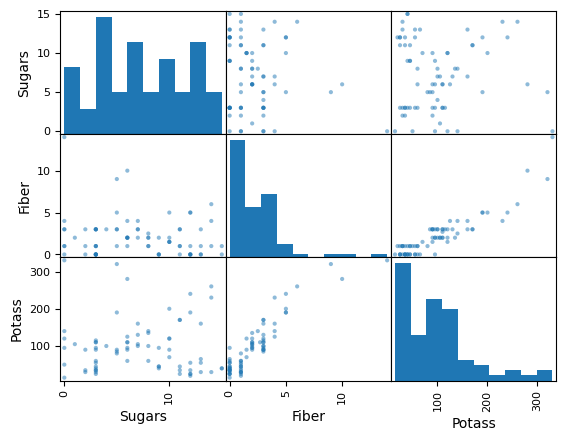

In [ ]:
#Q1 identifying multicollinearity
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
cereals = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/cereals.CSV")

X = pd.DataFrame(cereals[['Sugars', 'Fiber', 'Potass']])

pd.plotting.scatter_matrix(X)

X = X.dropna()

X = sm.add_constant(X)

[inf.variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]

In [ ]:
#Q2 Principal component
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

clothes_train = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/clothing_store_PCA_training")
clothes_test = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/framingham_nb_test.csv")

X = clothes_train.drop('Sales per Visit', 1)

X.corr()

pca01 = PCA(n_components=5)
principComp = pca01.fit_transform(X)

np.cumsum(pca01.explained_variance_ratio_)

<ipython-input-22-dde4fa524a5d>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = clothes_train.drop('Sales per Visit', 1)


array([0.55360708, 0.922859  , 0.99314333, 0.99985255, 1.        ])

# Logistic Regression


In [ ]:
#Q1 Logistic
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
sales_train = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/clothing_sales_training.csv")
sales_test = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/clothing_sales_test.csv")

X = pd.DataFrame(sales_train[['Days', 'Web']])
X = sm.add_constant(X)
y = pd.DataFrame(sales_train[['CC']])

logreg01 = sm.Logit(y, X).fit()
logreg01.summary2()

X_test = pd.DataFrame(sales_test[['Days', 'Web']])
X_test = sm.add_constant(X_test)
y_test = pd.DataFrame(sales_test[['CC']])
logreg01_test = sm.Logit(y_test, X_test).fit()
logreg01_test.summary2()

Optimization terminated successfully.
         Current function value: 0.655955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656885
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: CC               Pseudo R-squared: 0.052     
Date:               2023-12-05 16:29 AIC:              1838.7104 
No. Observations:   1395             BIC:              1854.4324 
Df Model:           2                Log-Likelihood:   -916.36   
Df Residuals:       1392             LL-Null:          -966.40   
Converged:          1.0000           LLR p-value:      1.8534e-22
No. Iterations:     5.0000           Scale:            1.0000    
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.4634     0.0873    5.3105   0.0000    0.2924    0.6345
Days      -0.0035     0.0004   -8.2261   0.0000   -0.0043   -0.0026
Web        1.0973     0.2830    3.8780   0.0001    0.5427    1.6519
=================================================================

"""

In [ ]:
#Q2 poisson
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tools.tools as stattools

churn = pd.read_csv("/content/drive/MyDrive/DSPR_Data_Sets/Website Data Sets/churn")

churn_ind = pd.get_dummies(churn['Churn'], drop_first = True)

X = pd.DataFrame(churn_ind)
X = sm.add_constant(X)
X.columns = ['const', 'Churn = True']

y = pd.DataFrame(churn[['CustServ Calls']])

poisreg01 = sm.GLM(y, X, family = sm.families.
Poisson()).fit()

poisreg01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         CustServ Calls   No. Observations:                 3333
Model:                            GLM   Df Residuals:                     3331
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5217.1
Date:                Tue, 05 Dec 2023   Deviance:                       3902.4
Time:                        16:33:31   Pearson chi2:                 3.40e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04261
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3714      0.016     23.877      0.000       0.341       0.402
Churn = True     0.4305      0.034     12.582      0.000       0.363       0.498
================================================================================
"""